<a href="https://colab.research.google.com/github/SJ-1011/Pill_Data_AR/blob/main/Pill_Classification_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Ultralytics YOLO 설치
!pip install ultralytics

In [ ]:
# @title 데이터셋 재구성 (사용하지 않음)
# 주어진 데이터 구조를 맞추기 위해 데이터셋을 재구성
# Colab에서는 사용하지 않음
import os
import shutil

def restructure_dataset(base_dir='sample_split', output_dir='dataset'):
    for split in ['train', 'val', 'test']:
        image_output_dir = os.path.join(output_dir, 'images', split)
        label_output_dir = os.path.join(output_dir, 'labels', split)
        os.makedirs(image_output_dir, exist_ok=True)
        os.makedirs(label_output_dir, exist_ok=True)

        split_dir = os.path.join(base_dir, split)
        class_dirs = [d for d in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, d))]

        for class_dir in class_dirs:
            class_path = os.path.join(split_dir, class_dir)
            images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]

            for image in images:
                base_name = os.path.basename(image)
                image_src_path = os.path.join(class_path, image)
                label_src_path = os.path.join(class_path, base_name.replace('.jpg', '.txt'))

                image_dst_path = os.path.join(image_output_dir, base_name)
                label_dst_path = os.path.join(label_output_dir, base_name.replace('.jpg', '.txt'))

                shutil.copy(image_src_path, image_dst_path)
                shutil.copy(label_src_path, label_dst_path)

if __name__ == "__main__":
    restructure_dataset()


In [4]:
# @title cuda 사용 가능 여부
import torch
print(torch.cuda.is_available())  # True가 출력되어야 합니다.

True


In [46]:
# @title YOLO 모델 training
from ultralytics import YOLO
import torch

# 모델 생성 (YOLOv8s 사용)
model = YOLO('yolov8s.pt')

# 데이터셋 yaml 파일 경로
data_yaml = '/content/gdrive/MyDrive/dataset_yolo.yaml'

'''
train: /content/gdrive/MyDrive/yolo_sample/images/train
val: /content/gdrive/MyDrive/yolo_sample/images/val
test: /content/gdrive/MyDrive/yolo_sample/images/test
'''

# GPU 사용 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 훈련
model.train(data=data_yaml, epochs=50, batch=16, name='Pill_model', device=0)

# 검증
model.val(data=data_yaml, imgsz=640)

# 모델 경로 지정
model_path = '/content/gdrive/MyDrive/sample_model/Pill_model.pt'

# 모델 저장
model.save(model_path)


Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/dataset_yolo.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=Pill_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/gdrive/MyDrive/yolo_dataset/labels/train... 641 images, 0 backgrounds, 0 corrupt: 100%|██████████| 641/641 [01:12<00:00,  8.88it/s]


train: New cache created: /content/gdrive/MyDrive/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/yolo_dataset/labels/val... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:02<00:00, 81.30it/s]


val: New cache created: /content/gdrive/MyDrive/yolo_dataset/labels/val.cache
Plotting labels to runs/detect/Pill_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/Pill_model2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       7.7G     0.5205      4.723     0.9171          1        640: 100%|██████████| 41/41 [00:41<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


                   all        240        240      0.558      0.647      0.665      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.83G     0.4424      1.829     0.8739          4        640: 100%|██████████| 41/41 [00:40<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]


                   all        240        240      0.712      0.913      0.926      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.84G     0.4083      1.157     0.8586          3        640: 100%|██████████| 41/41 [00:37<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all        240        240      0.872      0.942       0.97      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.84G     0.4214     0.8958     0.8827          4        640: 100%|██████████| 41/41 [00:41<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        240        240      0.967      0.987      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.72G     0.3969     0.7083     0.8636          2        640: 100%|██████████| 41/41 [00:39<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]


                   all        240        240      0.975      0.993      0.993      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.7G     0.3753     0.5799     0.8625          1        640: 100%|██████████| 41/41 [00:39<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        240        240      0.959      0.979      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.7G     0.3442      0.468      0.845          2        640: 100%|██████████| 41/41 [00:41<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all        240        240      0.974      0.966      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.83G     0.3531     0.4708     0.8606          2        640: 100%|██████████| 41/41 [00:37<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        240        240      0.911      0.937      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.71G     0.3403     0.4828     0.8546          1        640: 100%|██████████| 41/41 [00:40<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all        240        240      0.983      0.991      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.71G     0.3312     0.4209     0.8425          1        640: 100%|██████████| 41/41 [00:40<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        240        240      0.975      0.979      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.7G     0.3242     0.4091      0.845          1        640: 100%|██████████| 41/41 [00:43<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]

                   all        240        240      0.991          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.83G     0.3098     0.3368     0.8349          1        640: 100%|██████████| 41/41 [00:38<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        240        240      0.971      0.968      0.992      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.71G     0.3243     0.4315     0.8468          1        640: 100%|██████████| 41/41 [00:38<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        240        240      0.986          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.71G     0.3174     0.3648     0.8521          1        640: 100%|██████████| 41/41 [00:41<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]


                   all        240        240      0.993      0.999      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.7G     0.3076     0.3514     0.8361          1        640: 100%|██████████| 41/41 [00:43<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        240        240      0.981      0.989      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.83G     0.3022     0.3328     0.8385          1        640: 100%|██████████| 41/41 [00:42<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all        240        240      0.993      0.998      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.71G     0.3023     0.3226     0.8441          1        640: 100%|██████████| 41/41 [00:41<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        240        240      0.987      0.994      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.7G     0.3029     0.3249     0.8549          4        640: 100%|██████████| 41/41 [00:39<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

                   all        240        240      0.988          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       4.7G     0.2955     0.3077     0.8307          4        640: 100%|██████████| 41/41 [00:38<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        240        240      0.991      0.998      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.84G     0.2862     0.2752     0.8359          4        640: 100%|██████████| 41/41 [00:40<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        240        240      0.992      0.999      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.71G     0.2871     0.2761     0.8283          4        640: 100%|██████████| 41/41 [00:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        240        240      0.986          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.7G     0.2725     0.2721     0.8253          4        640: 100%|██████████| 41/41 [00:40<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]

                   all        240        240      0.992          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.69G     0.2565     0.2703     0.8086          0        640: 100%|██████████| 41/41 [00:41<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        240        240       0.97      0.973      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.84G     0.2739     0.2673     0.8371          4        640: 100%|██████████| 41/41 [00:38<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        240        240      0.988          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.72G     0.3044     0.3034     0.8493          1        640: 100%|██████████| 41/41 [00:40<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        240        240      0.991      0.996      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.71G     0.2662     0.2593     0.8263          4        640: 100%|██████████| 41/41 [00:40<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        240        240      0.991          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.7G     0.2695     0.2405     0.8337          3        640: 100%|██████████| 41/41 [00:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        240        240      0.981      0.986      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.68G     0.2722     0.2528     0.8331          4        640: 100%|██████████| 41/41 [00:37<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        240        240      0.993          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.71G     0.2626     0.2455     0.8312          1        640: 100%|██████████| 41/41 [00:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        240        240      0.992          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.7G     0.2449     0.2258     0.8042          0        640: 100%|██████████| 41/41 [00:44<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]

                   all        240        240      0.993          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.7G     0.2711     0.2629     0.8417          1        640: 100%|██████████| 41/41 [00:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        240        240      0.993          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.84G     0.2587     0.2335     0.8461          2        640: 100%|██████████| 41/41 [00:40<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all        240        240      0.994      0.997      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.71G      0.231     0.2147     0.8318          2        640: 100%|██████████| 41/41 [00:38<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        240        240      0.994          1      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.7G     0.2378     0.2057     0.8231          4        640: 100%|██████████| 41/41 [00:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        240        240      0.993          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.7G     0.2346     0.2153     0.8319          1        640: 100%|██████████| 41/41 [00:39<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        240        240      0.996          1      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.84G     0.2377     0.2478     0.8318          1        640: 100%|██████████| 41/41 [00:39<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        240        240      0.994          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.72G     0.2306     0.2071     0.8234          3        640: 100%|██████████| 41/41 [00:39<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]

                   all        240        240      0.993          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.7G     0.2279     0.2029     0.8288          2        640: 100%|██████████| 41/41 [00:37<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        240        240      0.995      0.999      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.7G     0.2149     0.1934     0.8139          2        640: 100%|██████████| 41/41 [00:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]

                   all        240        240      0.994          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.83G     0.2314     0.2015      0.826          4        640: 100%|██████████| 41/41 [00:41<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        240        240      0.994          1      0.995      0.993


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.71G     0.1574     0.1531     0.7686          1        640: 100%|██████████| 41/41 [00:37<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        240        240      0.992          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.7G     0.1519     0.1475     0.7715          1        640: 100%|██████████| 41/41 [00:40<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        240        240      0.995          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.7G     0.1476     0.1517     0.7775          1        640: 100%|██████████| 41/41 [00:43<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        240        240      0.993          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.84G     0.1478     0.1443     0.7746          1        640: 100%|██████████| 41/41 [00:40<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]

                   all        240        240      0.995          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.72G     0.1414     0.1373     0.7722          1        640: 100%|██████████| 41/41 [00:39<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]

                   all        240        240      0.995          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.71G     0.1489     0.1553     0.7816          1        640: 100%|██████████| 41/41 [00:38<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all        240        240      0.995          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.7G     0.1331     0.1321     0.7623          1        640: 100%|██████████| 41/41 [00:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

                   all        240        240      0.995          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.84G     0.1338      0.132     0.7753          1        640: 100%|██████████| 41/41 [00:37<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

                   all        240        240      0.995          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.71G     0.1358     0.1328     0.7661          1        640: 100%|██████████| 41/41 [00:41<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]

                   all        240        240      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.7G     0.1284     0.1301     0.7626          1        640: 100%|██████████| 41/41 [00:38<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]


                   all        240        240      0.995          1      0.995      0.995

50 epochs completed in 0.641 hours.
Optimizer stripped from runs/detect/Pill_model2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/Pill_model2/weights/best.pt, 22.5MB

Validating runs/detect/Pill_model2/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133324 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


                   all        240        240      0.995          1      0.995      0.995
             196000001         10         10      0.994          1      0.995      0.995
             196500004         15         15      0.995          1      0.995      0.995
             199502575         13         13          1          1      0.995      0.995
             200008571         11         11      0.994          1      0.995      0.986
             200402485         13         13          1          1      0.995      0.995
             200402928         16         16      0.995          1      0.995      0.995
             200404719         10         10      0.993          1      0.995      0.995
             200410999         11         11      0.995          1      0.995      0.995
             200600116         12         12      0.994          1      0.995      0.995
             200702709          9          9      0.992          1      0.995      0.995
             20070297

val: Scanning /content/gdrive/MyDrive/yolo_dataset/labels/val.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:25<00:00,  1.73s/it]


                   all        240        240      0.995          1      0.995      0.994
             196000001         10         10      0.994          1      0.995      0.995
             196500004         15         15      0.995          1      0.995      0.995
             199502575         13         13          1          1      0.995      0.995
             200008571         11         11      0.994          1      0.995      0.987
             200402485         13         13          1          1      0.995      0.995
             200402928         16         16      0.995          1      0.995      0.995
             200404719         10         10      0.993          1      0.995      0.995
             200410999         11         11      0.995          1      0.995      0.995
             200600116         12         12      0.994          1      0.995      0.995
             200702709          9          9      0.992          1      0.995      0.995
             20070297

In [47]:
# @title 가중치, training 정보 옮기기
from google.colab import drive
import shutil

# 'Pill_detection' 폴더를 Google Drive로 복사
shutil.copytree('/content/runs/detect/Pill_model2', '/content/gdrive/MyDrive/YOLO_Model/Pill_model')
shutil.copytree('/content/runs/detect/Pill_model22', '/content/gdrive/MyDrive/YOLO_Model/Pill_model2')


'/content/gdrive/MyDrive/YOLO_Model/Pill_model2'

In [62]:
# @title 모델 선택
# 모델 경로 지정
model_path = '/content/runs/detect/Pill_model2/weights/best.pt'

# 모델 저장
model = YOLO(model_path)

In [63]:
predict_image_path = "/content/gdrive/MyDrive/test_200600116_201403243.jpg"
predict_image_crop_path = f"{predict_image_path}_crop.jpg"

In [ ]:
2


0: 640x640 2 200600116s, 16.3ms
Speed: 3.1ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Number of objects detected:  2
[[174.29031, 313.9441, 589.8949, 583.9633], [807.189, 591.2667, 1037.7123, 824.33276]]


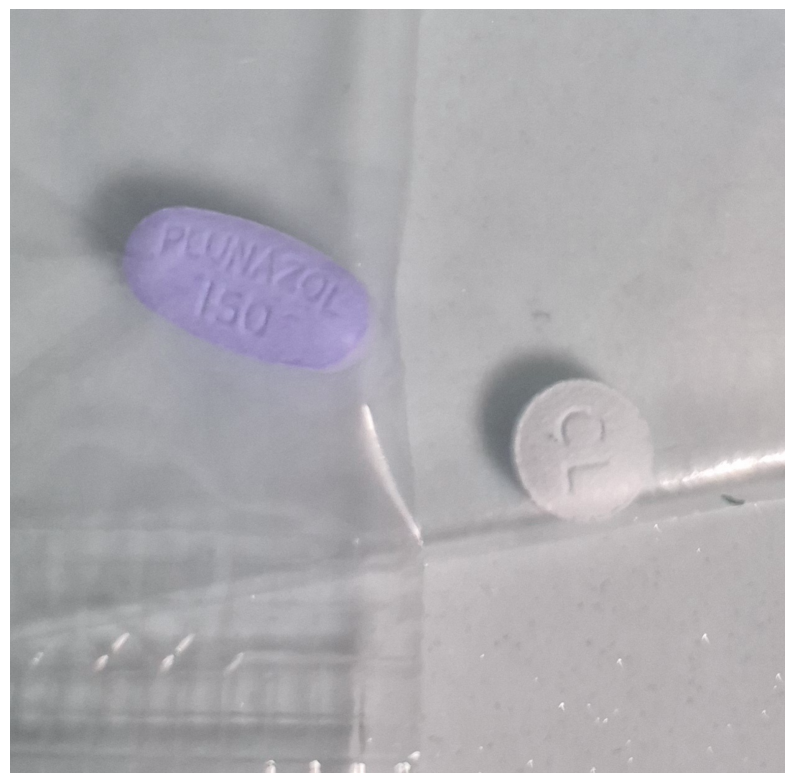

In [66]:
# @title 모델 예측
from ultralytics import YOLO
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
# 모델 경로 지정
model_path = '/content/runs/detect/Pill_detection3/weights/best.pt'

# 모델 저장
model = YOLO(model_path)

# 클래스 이름 로드 (yaml 파일의 내용)
class_names = [
  '196000001', '196500004', '199502575', '200008571', '200402485', '200402928', '200404719',
  '200410999', '200600116', '200702709', '200702970', '200806299', '201207004', '201403243',
  '201503295', '201701435', '201705221', '201901014', '201906965', '201907607'
]

# 모델 로드
# model = YOLO(model_path)

# 이미지 읽기
img_path = predict_image_path
img = cv2.imread(img_path)

# 모델 예측
prediction = model.predict(img)[0]

# 검출된 객체 수
num = len(prediction.boxes)
print("Number of objects detected: ", num)

# 예측된 클래스 인덱스 및 확률 출력
class_indices = prediction.boxes.cls.cpu().numpy()
confidences = prediction.boxes.conf.cpu().numpy()

# 바운딩 박스
BBox = []

# 예측 결과를 이미지로 저장 (OpenCV로 텍스트 크기 조정)
# result_img = img.copy()
for box, cls_idx, conf in zip(prediction.boxes, class_indices, confidences):
    # 바운딩 박스 좌표
    # x1, y1: 바운딩 박스의 왼쪽 상단 모서리의 좌표
    # x2, y2: 바운딩 박스의 오른쪽 하단 모서리의 좌표
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

    BBox.append([x1, y1, x2, y2])

    # 클래스 이름 및 확률
    class_name = class_names[int(cls_idx)]
    class_label = f"{class_name}: {conf:.2f}"

#     # 바운딩 박스 그리기
#     cv2.rectangle(result_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

#     # 텍스트 크기 조정
#     font_scale = 1.0
#     font_thickness = 2
#     (text_width, text_height), baseline = cv2.getTextSize(class_label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

#     # 텍스트 배경 그리기
#     cv2.rectangle(result_img, (int(x1), int(y1) - text_height - baseline), (int(x1) + text_width, int(y1)), (0, 255, 0), -1)

#     # 텍스트 그리기
#     cv2.putText(result_img, class_label, (int(x1), int(y1) - baseline), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness)

# # BGR to RGB
# result_img = result_img[:, :, ::-1]
# result_img = Image.fromarray(result_img)
# output_path = '/content/gdrive/MyDrive/output/200600116_3.jpg'
# result_img.save(output_path)

print(BBox)

# print(f"Prediction result saved to {output_path}")

# 결과 이미지 로드 및 시각화
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


바운딩 박스 = [[174.29031, 313.9441, 589.8949, 583.9633], [807.189, 591.2667, 1037.7123, 824.33276]]


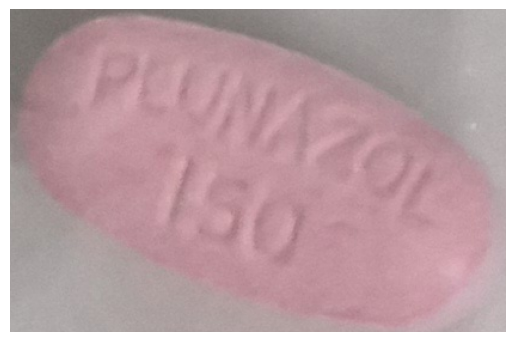

tensor([[3.0214e-04, 3.4346e-04, 1.1585e-04, 1.8302e-04, 3.4885e-04, 3.0438e-04, 1.3463e-02, 1.5375e-01, 8.2904e-01, 3.2413e-04, 5.0571e-05, 4.4651e-05, 2.6916e-05, 9.6884e-05, 5.2780e-05, 1.0375e-04, 4.7625e-05, 1.1492e-03, 9.2226e-05, 1.5479e-04]])
196000001: 0.00
196500004: 0.00
199502575: 0.00
200008571: 0.00
200402485: 0.00
200402928: 0.00
200404719: 0.01
200410999: 0.15
200600116: 0.83
200702709: 0.00
200702970: 0.00
200806299: 0.00
201207004: 0.00
201403243: 0.00
201503295: 0.00
201701435: 0.00
201705221: 0.00
201901014: 0.00
201906965: 0.00
201907607: 0.00
예측된 클래스: 200600116
확신도: 0.8290417194366455


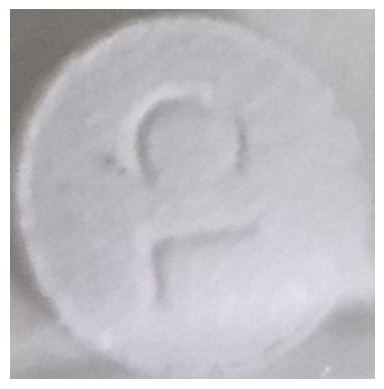

tensor([[1.6490e-04, 9.6314e-04, 3.0237e-05, 7.4657e-03, 1.6253e-04, 1.0133e-04, 2.8829e-04, 5.1784e-05, 2.2399e-05, 4.7983e-05, 5.3699e-05, 6.1953e-05, 1.9293e-05, 9.9018e-01, 1.5652e-05, 6.1903e-05, 4.5462e-05, 1.5539e-04, 4.4379e-05, 6.5644e-05]])
196000001: 0.00
196500004: 0.00
199502575: 0.00
200008571: 0.01
200402485: 0.00
200402928: 0.00
200404719: 0.00
200410999: 0.00
200600116: 0.00
200702709: 0.00
200702970: 0.00
200806299: 0.00
201207004: 0.00
201403243: 0.99
201503295: 0.00
201701435: 0.00
201705221: 0.00
201901014: 0.00
201906965: 0.00
201907607: 0.00
예측된 클래스: 201403243
확신도: 0.9901784658432007


In [70]:
import torch
import torch.nn as nn
import numpy as np
import random
from PIL import Image
import torchvision.transforms as transforms
import cv2
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

class ResizeAndPad(object):
    def __init__(self, desired_size):
        self.desired_size = desired_size

    def __call__(self, image):
        desired_width, desired_height = self.desired_size
        original_width, original_height = image.size

        # 비율 유지하여 리사이즈
        ratio = min(desired_width / original_width, desired_height / original_height)
        new_width = int(original_width * ratio)
        new_height = int(original_height * ratio)
        resized_image = image.resize((new_width, new_height), Image.LANCZOS)

        # 새 이미지 생성 및 패딩
        new_image = Image.new("RGB", (desired_width, desired_height))
        pad_left = (desired_width - new_width) // 2
        pad_top = (desired_height - new_height) // 2
        new_image.paste(resized_image, (pad_left, pad_top))

        return new_image

class PillModel(nn.Module):
    # bulid cnn model
    def __init__(self):
        super(PillModel, self).__init__()

        # 클래스 개수 정의
        self.m_ClassNum = 20
        # ResNet 모델 초기화
        self.resnet = models.resnet18(pretrained=True)

        # 마지막 fully connected layer의 출력 크기를 클래스 수에 맞게 조정
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, self.m_ClassNum)


    def forward(self, x):
        # ResNet 모델의 forward pass 수행
        x = self.resnet(x)
        return x

# 이미지 전처리 함수
def preprocess_image(image_path):
    transform = transforms.Compose([ResizeAndPad((500, 500)),
                                           transforms.ToTensor()])
    image = Image.open(image_path).convert("RGB")  # 이미지를 RGB 형식으로 열기
    image = transform(image).unsqueeze(0)         # 배치 차원 추가
    return image

# 모델 로드
model = PillModel()
checkpoint = torch.load("/content/gdrive/MyDrive/sample_model/20_class_model_random.pt", map_location=torch.device('cpu'))  # 모델 파일 로드
model.load_state_dict(checkpoint['model_state_dict'])  # 모델의 상태 사전 로드
model.eval()

# 클래스 이름 목록
class_names = checkpoint['label_name']

# 이미지 분류 함수
def classify_image(image, model, class_names):


    # 모델 추론
    with torch.no_grad():
        output = model(image)

    # 확률로 변환
    probabilities = torch.softmax(output, dim=1)

    print(probabilities)
    # 클래스 이름과 해당 확률 출력
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {probabilities[0][i].item():.2f}")

    # 클래스 예측
    _, predicted_class = torch.max(probabilities, 1)

    # 클래스 이름 가져오기
    class_name = class_names[predicted_class.item()]

    return class_name, probabilities[0][predicted_class].item()

# 이미지 분류
image_path = predict_image_path  # 이미지 파일 경로

# 이미지 크롭
image = cv2.imread(image_path)

# 바운딩 박스 좌표 확인
print(f'바운딩 박스 = {BBox}')
for i in range(len(BBox)):
    # 좌표를 정수로 변환
    x1, y1, x2, y2 = map(int, BBox[i])

    # 이미지 크롭
    cropped_image = image[y1:y2, x1:x2]

    # 크롭된 이미지 화면에 표시
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # 이미지 저장
    cv2.imwrite(predict_image_crop_path, cropped_image)

    # 새 이미지 분류
    image_path = predict_image_crop_path  # 이미지 파일 경로

    # 이미지 전처리
    image = preprocess_image(image_path)

    predicted_class, confidence = classify_image(image, model, class_names)

    # 결과 출력
    print("예측된 클래스:", predicted_class)
    print("확신도:", confidence)

    image_path = predict_image_path
    image = cv2.imread(image_path)